In [365]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# 3 Countries Classification

In [367]:
data = pd.read_csv('data/3countries.csv')

In [368]:
def getNewDataset(tax_rank,data):  #get features corresponding to taxonomic rank
    new_columns = ["ID","Humans"]  #keep ID and Humans columns
    for column in data.columns:
        if tax_rank + '__' in column:
            genus = column.split(tax_rank + '__')
            genus = genus[1].split("|")
            if len(genus)==1:
                new_columns.append(column)
    data = data.filter(new_columns)
    return data

## Genus-Level Features

In [390]:
y = data['ID']
X = data.drop(columns=['ID'])
new_columns = getNewDataset('g', X)
X = X.filter(new_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [391]:
input_features = len(X.columns)
targets = list(np.unique(y))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
dummy_ytrain = np_utils.to_categorical(encoded_Y_train)

encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Y_test)

In [392]:
def display_history(history):
    print(history.history.keys())
    
    # accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    print("Highest valiadtion accuracy at epoch ", np.argmax(history.history['val_acc'])+1)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('# Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('# Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

In [393]:
X_train.shape

(167, 250)

In [398]:
classifier = Sequential()
classifier.add(Dense(units = X_train.shape[1]+1, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_features))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = len(targets), kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

0.915662650602
(0.91853531774155461, 0.91566265060240959, 0.91578916805971267, None)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Highest valiadtion accuracy at epoch  8


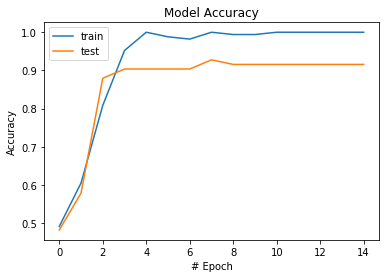

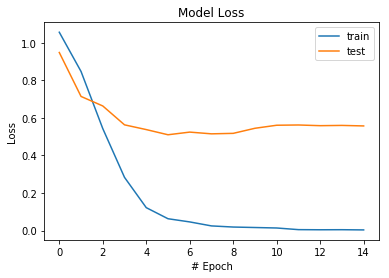

In [399]:
history = classifier.fit(X_train, dummy_ytrain, batch_size = 8, verbose=0, validation_data=(X_test,dummy_ytest), epochs = 15)

#y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict_classes(X_test)
print (accuracy_score(encoded_Y_test, y_pred2))
print (precision_recall_fscore_support(encoded_Y_test, y_pred2, average = "weighted"))
display_history(history)

<h3>Our model has been optimized for accuracy which explains why the model loss doesn't show a comparable decline on the test set</h3>

## Species-Level Features

In [400]:
y = data['ID']
X = data.drop(columns=['ID'])
new_columns = getNewDataset('s', X)
X = X.filter(new_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [401]:
input_features = len(X.columns)
targets = list(np.unique(y))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
dummy_ytrain = np_utils.to_categorical(encoded_Y_train)

encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Y_test)

In [402]:
classifier = Sequential()
classifier.add(Dense(units = X_train.shape[1]+1, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_features))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = len(targets), kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

0.915662650602
(0.92048737938178038, 0.91566265060240959, 0.91646263120894034, None)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Highest valiadtion accuracy at epoch  12


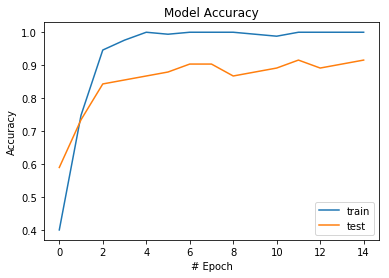

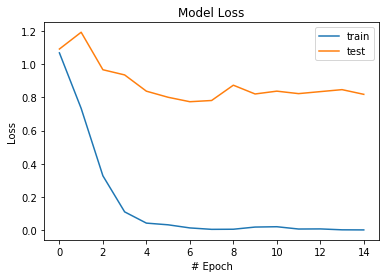

In [403]:
history = classifier.fit(X_train, dummy_ytrain, batch_size = 8, verbose=0, validation_data=(X_test,dummy_ytest), epochs = 15)

#y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict_classes(X_test)
print (accuracy_score(encoded_Y_test, y_pred2))
print (precision_recall_fscore_support(encoded_Y_test, y_pred2, average = "weighted"))
display_history(history)

## All Features

In [404]:
y = data['ID']
X = data.drop(columns=['ID'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [405]:
input_features = len(X.columns)
targets = list(np.unique(y))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
dummy_ytrain = np_utils.to_categorical(encoded_Y_train)

encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Y_test)

In [406]:
classifier = Sequential()
classifier.add(Dense(units = X_train.shape[1]+1, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_features))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = len(targets), kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

0.915662650602
(0.92048737938178038, 0.91566265060240959, 0.91646263120894034, None)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Highest valiadtion accuracy at epoch  5


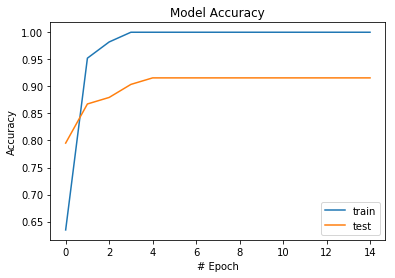

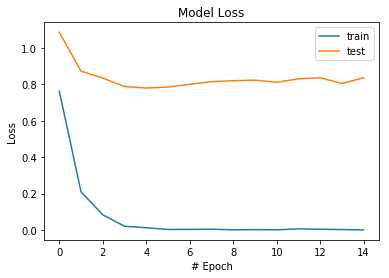

In [407]:
history = classifier.fit(X_train, dummy_ytrain, batch_size = 8, verbose=0, validation_data=(X_test,dummy_ytest), epochs = 15)

#y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict_classes(X_test)
print (accuracy_score(encoded_Y_test, y_pred2))
print (precision_recall_fscore_support(encoded_Y_test, y_pred2, average = "weighted"))
display_history(history)

# 7 Cities Classification

In [414]:
data = pd.read_csv('data/ALL.csv')

## Genus-Level Features

In [415]:
y = data['ID']
X = data.drop(columns=['ID'])
new_columns = getNewDataset('g', X)
X = X.filter(new_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [416]:
input_features = len(X.columns)
targets = list(np.unique(y))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
dummy_ytrain = np_utils.to_categorical(encoded_Y_train)

encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Y_test)

In [417]:
X_train.shape

(215, 313)

In [420]:
classifier = Sequential()
classifier.add(Dense(units = X_train.shape[1]+1, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_features))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.25))

classifier.add(Dense(units = len(targets), kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

0.822429906542
(0.83229005500489428, 0.82242990654205606, 0.8230874353430998, None)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Highest valiadtion accuracy at epoch  23


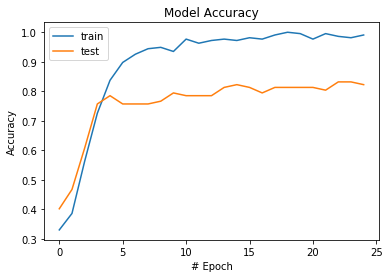

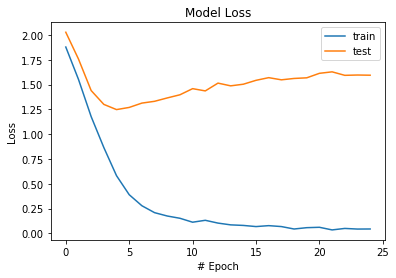

In [421]:
history = classifier.fit(X_train, dummy_ytrain, batch_size = 16, verbose=0, validation_data=(X_test,dummy_ytest), epochs = 25)

#y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict_classes(X_test)
print (accuracy_score(encoded_Y_test, y_pred2))
print (precision_recall_fscore_support(encoded_Y_test, y_pred2, average = "weighted"))
display_history(history)

## Species-Level Features

In [422]:
y = data['ID']
X = data.drop(columns=['ID'])
new_columns = getNewDataset('s', X)
X = X.filter(new_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [423]:
input_features = len(X.columns)
targets = list(np.unique(y))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
dummy_ytrain = np_utils.to_categorical(encoded_Y_train)

encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Y_test)

In [424]:
classifier = Sequential()
classifier.add(Dense(units = X_train.shape[1]+1, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_features))
classifier.add(Dropout(0.5))
#classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.25))

classifier.add(Dense(units = len(targets), kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

0.85046728972
(0.86594830499032904, 0.85046728971962615, 0.84593355494564659, None)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Highest valiadtion accuracy at epoch  24


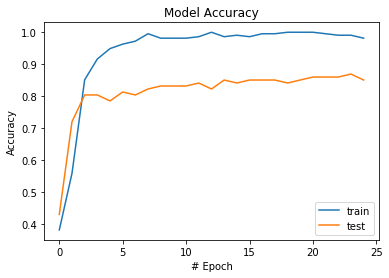

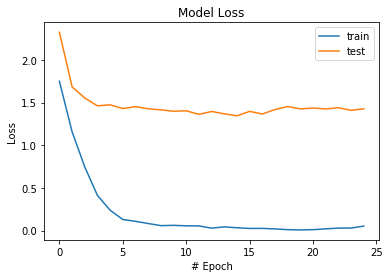

In [425]:
history = classifier.fit(X_train, dummy_ytrain, batch_size = 16, verbose=0, validation_data=(X_test,dummy_ytest), epochs = 25)

#y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict_classes(X_test)
print (accuracy_score(encoded_Y_test, y_pred2))
print (precision_recall_fscore_support(encoded_Y_test, y_pred2, average = "weighted"))
display_history(history)

## All Features

In [426]:
y = data['ID']
X = data.drop(columns=['ID'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [427]:
input_features = len(X.columns)
targets = list(np.unique(y))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
dummy_ytrain = np_utils.to_categorical(encoded_Y_train)

encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Y_test)

In [428]:
classifier = Sequential()
classifier.add(Dense(units = X_train.shape[1]+1, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_features))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = len(targets), kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

0.841121495327
(0.86029149977748098, 0.84112149532710279, 0.83817555784107689, None)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Highest valiadtion accuracy at epoch  18


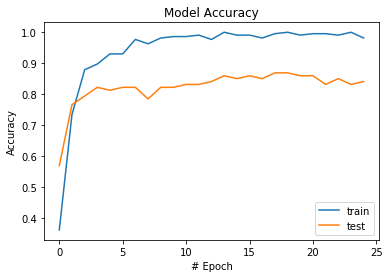

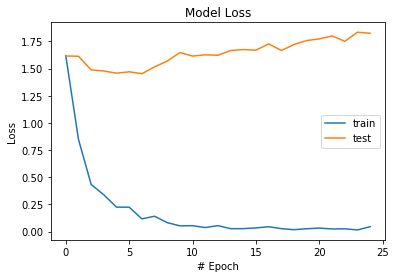

In [429]:
history = classifier.fit(X_train, dummy_ytrain, batch_size = 16, verbose=0, validation_data=(X_test,dummy_ytest), epochs = 25)

#y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict_classes(X_test)
print (accuracy_score(encoded_Y_test, y_pred2))
print (precision_recall_fscore_support(encoded_Y_test, y_pred2, average = "weighted"))
display_history(history)